In [41]:
import pandas as pd 

In [42]:
X_test = pd.read_csv("X_test_m4HAPAP.csv")
X_train = pd.read_csv("X_train_N1UvY30.csv")
y_train = pd.read_csv("y_train_or6m3Ta.csv")

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16080000 entries, 0 to 16079999
Data columns (total 12 columns):
 #   Column    Dtype  
---  ------    -----  
 0   obs_id    int64  
 1   venue     int64  
 2   order_id  int64  
 3   action    object 
 4   side      object 
 5   price     float64
 6   bid       float64
 7   ask       float64
 8   bid_size  int64  
 9   ask_size  int64  
 10  trade     bool   
 11  flux      int64  
dtypes: bool(1), float64(3), int64(6), object(2)
memory usage: 1.3+ GB


In [44]:
X_train_num = X_train.select_dtypes(include=['float64','int64'])
X_test_num = X_test.select_dtypes(include=['float64','int64'])


In [45]:
indexes = X_train_num.columns
summary_train = pd.DataFrame()
summary_test = pd.DataFrame()
# Statistics tabs 
for i in indexes : 
    X_train_stat = X_train_num.groupby("obs_id").agg({
        i: ["mean", "median", "std"]
    })
    X_test_stat = X_test_num.groupby("obs_id").agg({
        i: ["mean", "median", "std"]
    })
    X_train_stat.reset_index(drop=True,inplace= True)
    X_test_stat.reset_index(drop=True,inplace= True)

    X_train_stat.columns = ['_'.join(col).strip() for col in X_train_stat.columns.values]
    X_test_stat.columns = ['_'.join(col).strip() for col in X_test_stat.columns.values]
    if summary_test.empty and summary_train.empty : 
        summary_train = X_train_stat
        summary_test = X_test_stat
    else : 
        summary_train = summary_train.join(X_train_stat, how='left')
        summary_test = summary_test.join(X_test_stat, how='left')

for col in ['venue', 'action', 'side','trade']:
    X_train_freq = X_train.groupby('obs_id')[col].value_counts(normalize=True).unstack(fill_value=0)
    X_test_freq = X_test.groupby('obs_id')[col].value_counts(normalize=True).unstack(fill_value=0)
   
    X_train_freq.columns = [f"{col}_{i}" for i in X_train_freq.columns]  
    X_test_freq.columns = [f"{col}_{i}" for i in X_test_freq.columns]  
    
    X_train_freq.reset_index(drop=True,inplace=True)
    X_test_freq.reset_index(drop=True,inplace=True)

    summary_train = summary_train.join(X_train_freq, how='left')
    summary_test = summary_test.join(X_test_freq, how='left')


  


In [46]:
summary_test

,obs_id_mean,obs_id_median,obs_id_std,venue_mean,venue_median,venue_std,order_id_mean,order_id_median,order_id_std,price_mean,...,venue_3,venue_4,venue_5,action_A,action_D,action_U,side_A,side_B,trade_False,trade_True
0,0.0,0.0,0.0,3.42,4.0,0.912096,25.49,25.5,14.588978,0.5225,...,0.00,0.71,0.00,0.50,0.50,0.00,0.72,0.28,1.00,0.00
1,1.0,1.0,0.0,2.62,2.5,1.818980,36.48,37.0,19.246660,0.0993,...,0.11,0.18,0.21,0.48,0.50,0.02,0.97,0.03,1.00,0.00
2,2.0,2.0,0.0,1.64,2.0,1.623813,28.69,27.5,17.145659,0.3889,...,0.31,0.10,0.02,0.53,0.47,0.00,0.50,0.50,1.00,0.00
3,3.0,3.0,0.0,2.85,4.0,1.742951,21.91,18.0,13.355357,-1.3518,...,0.03,0.29,0.22,0.45,0.52,0.03,0.30,0.70,1.00,0.00
4,4.0,4.0,0.0,3.34,4.0,1.505679,33.67,33.0,18.754692,-0.2852,...,0.20,0.32,0.24,0.49,0.51,0.00,0.40,0.60,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81595,81595.0,81595.0,0.0,3.48,4.0,1.666545,37.47,35.5,24.595908,0.0111,...,0.05,0.47,0.27,0.56,0.43,0.01,0.64,0.36,0.99,0.01
81596,81596.0,81596.0,0.0,3.49,4.0,1.077736,33.62,35.5,19.096660,-0.0870,...,0.43,0.37,0.14,0.50,0.50,0.00,0.37,0.63,1.00,0.00
81597,81597.0,81597.0,0.0,3.74,4.0,1.142565,31.33,30.5,17.979256,0.2710,...,0.00,0.75,0.12,0.51,0.49,0.00,0.55,0.45,1.00,0.00
81598,81598.0,81598.0,0.0,3.50,4.0,1.417780,34.44,34.5,21.762409,0.0617,...,0.17,0.42,0.23,0.57,0.43,0.00,0.33,0.67,1.00,0.00


In [53]:
summary_test = summary_test.drop(
    columns=[col for col in summary_test.columns if 'obs_id' in col]
)
summary_train = summary_train.drop(
    columns=[col for col in summary_train.columns if 'obs_id' in col]
)


/var/folders/3l/s4t1bsn973dfhyz_6q842jr00000gn/T/ipykernel_1441/3913922617.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/var/folders/3l/s4t1bsn973dfhyz_6q842jr00000gn/T/ipykernel_1441/3913922617.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/var/folders/3l/s4t1bsn973dfhyz_6q842jr00000gn/T/ipykernel_1441/3913922617.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/var/folders/3l/s4t1bsn973dfhyz_6q842jr00000gn/T/ipykernel_1441/3913922617.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; supp

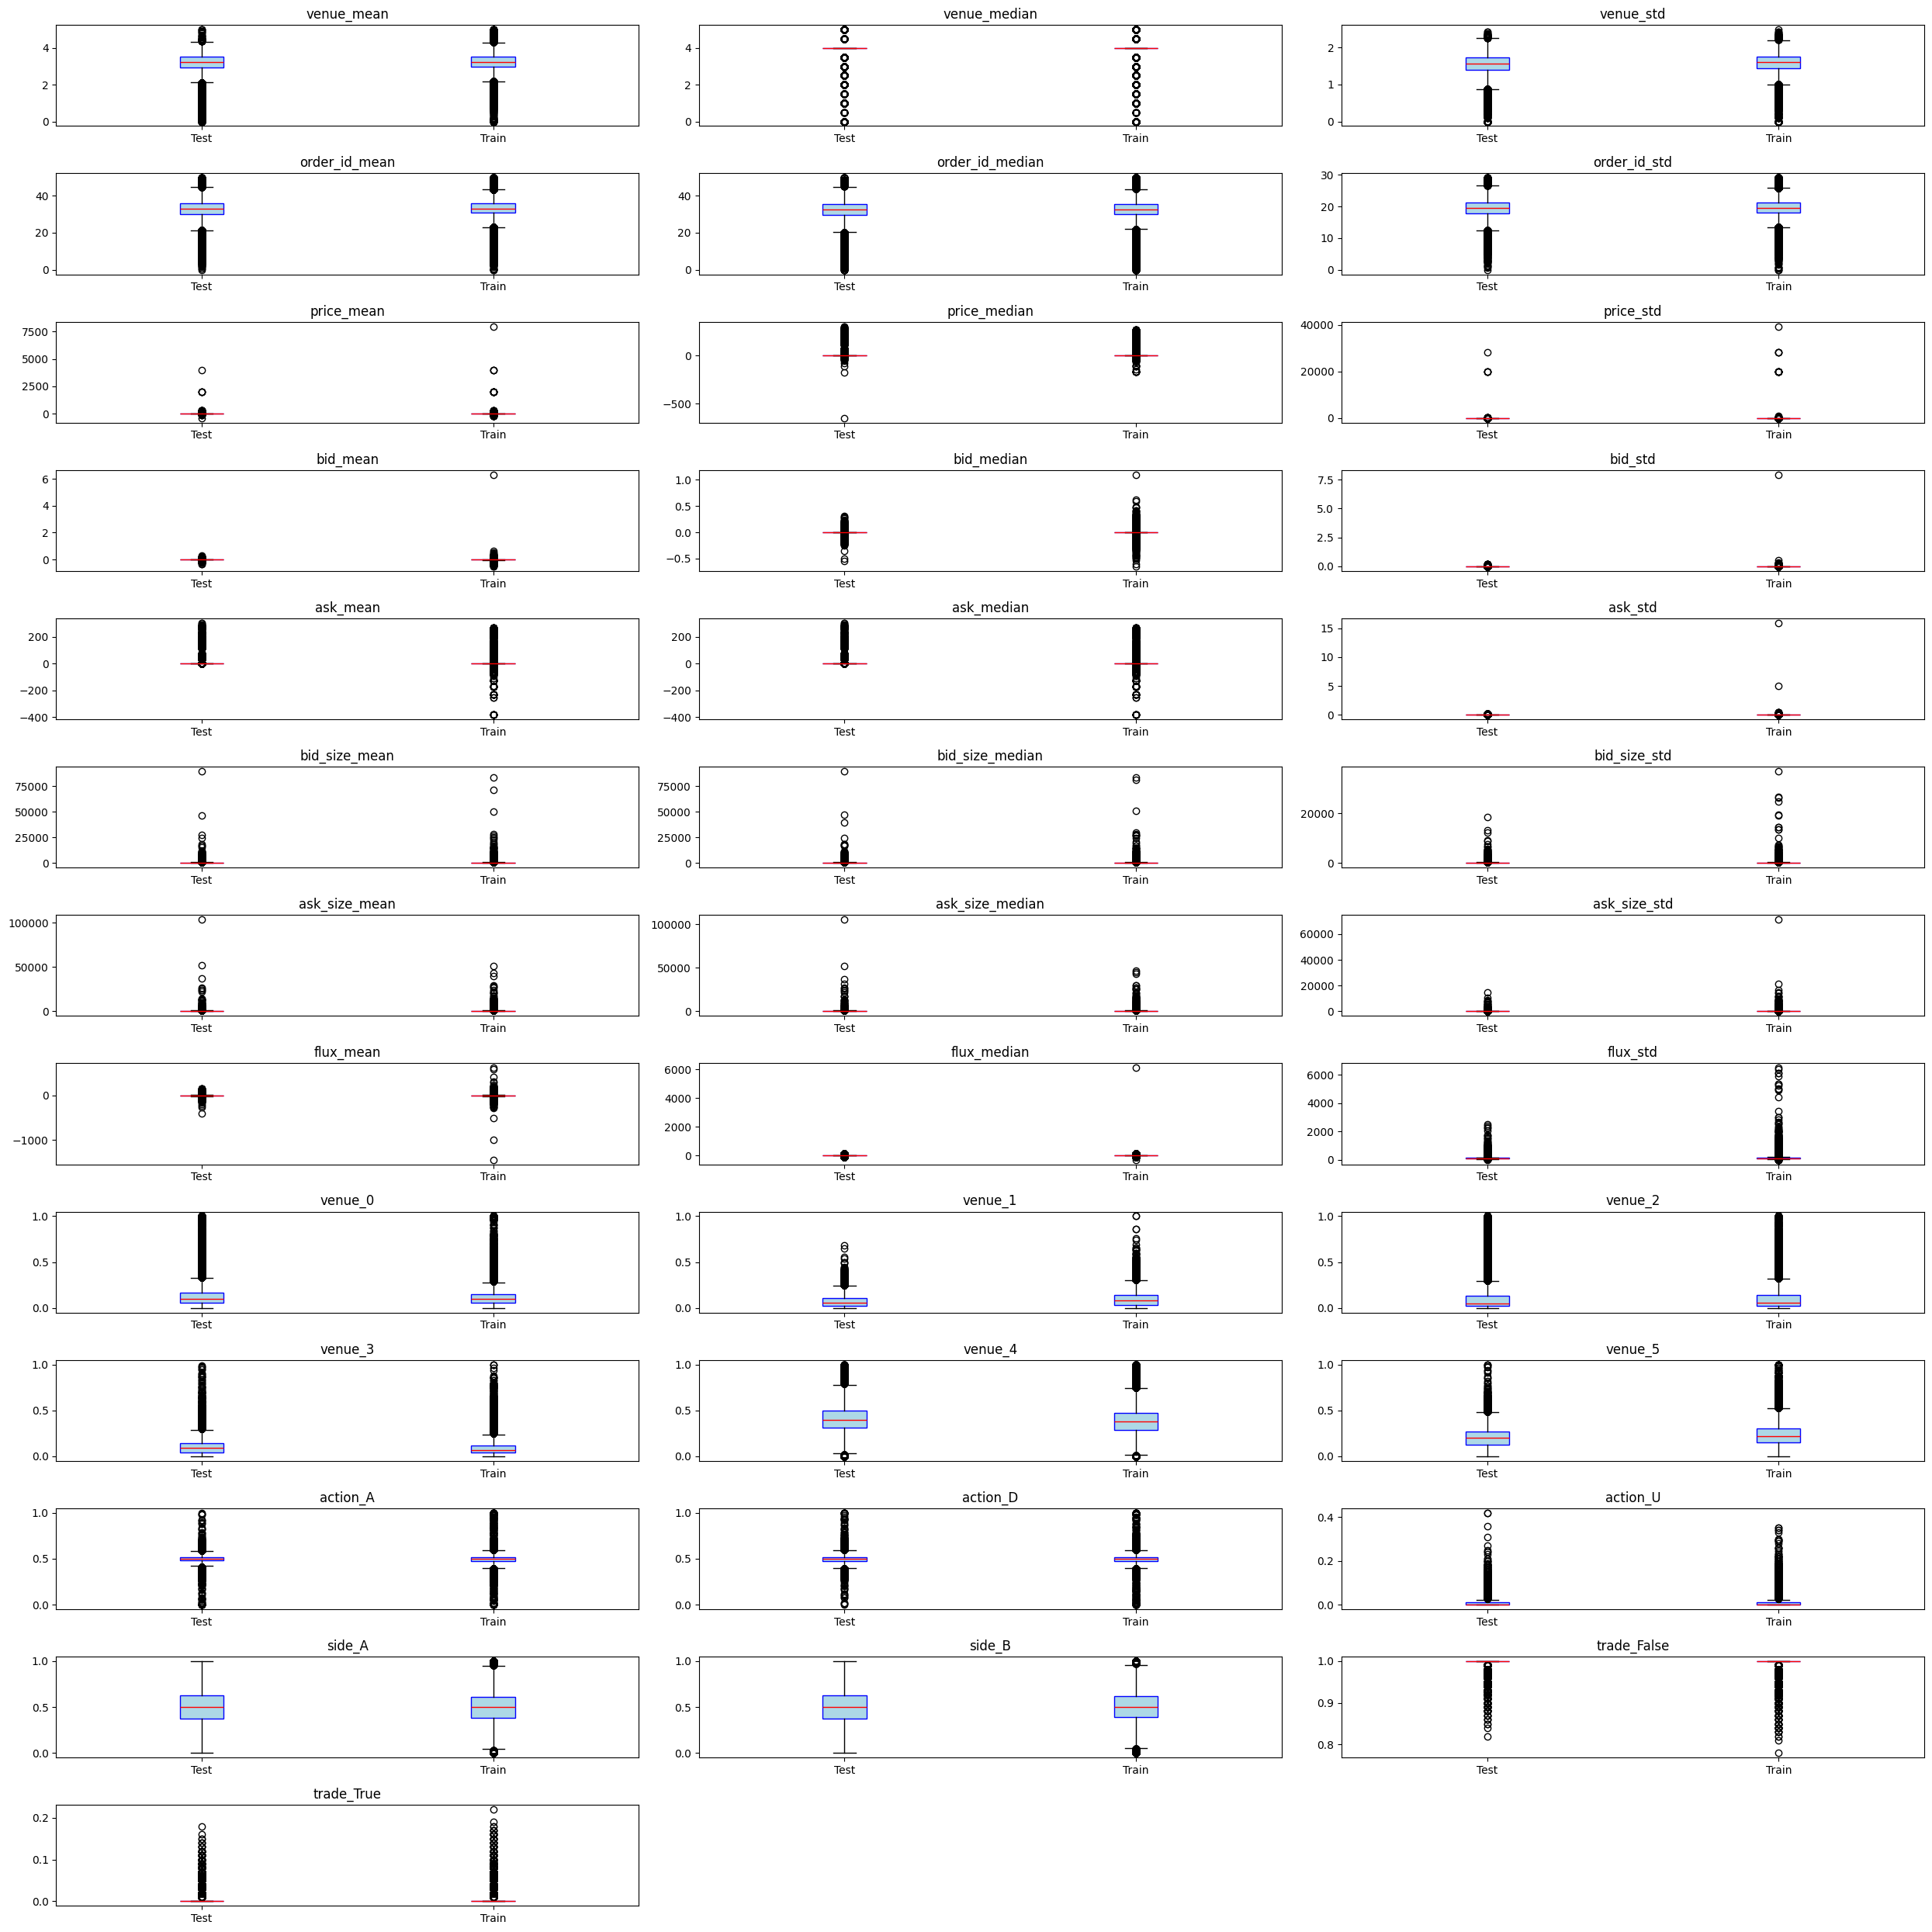

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Number of columns in the grid
n_cols = 3
n_rows = int(np.ceil(len(summary_test.columns) / n_cols))  # Calculate the number of required rows

# Create a single figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 25))

# Iterate over each column and each axis
for ax, col in zip(axes.flatten(), summary_test.columns):
    ax.boxplot(
        [summary_test[col], summary_train[col]],  # Data to compare
        labels=['Test', 'Train'],  # Labels to differentiate the groups
        patch_artist=True,  # Enable fill colors
        boxprops=dict(facecolor='lightblue', color='blue'),  # Boxplot color
        medianprops=dict(color='red')  # Median color
    )
    ax.set_title(col)  # Add a title for each subplot

# Remove unused subplots if the number of columns is odd
for ax in axes.flatten()[len(summary_test.columns):]:
    ax.set_visible(False)

plt.tight_layout()  # Adjust the spacing
plt.show()


In [58]:
summary_train = summary_train.join(y_train, how = 'left' )

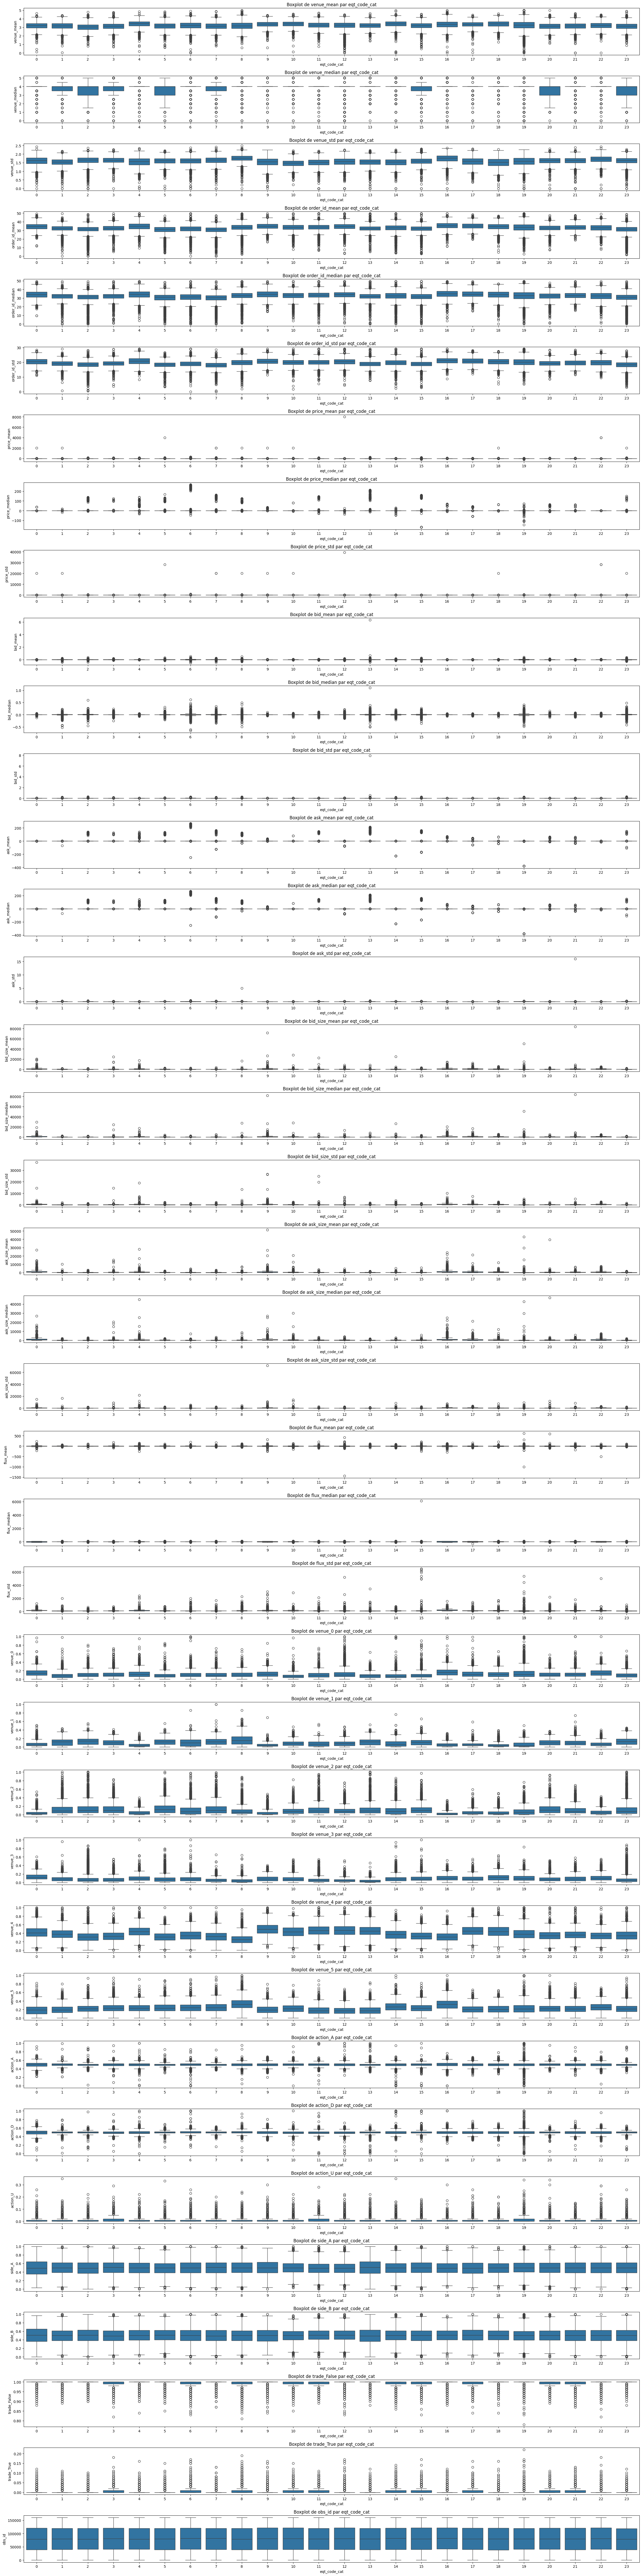

In [65]:
import seaborn as sns
columns_to_plot = [col for col in summary_train.columns if col != 'eqt_code_cat']

# Create a single figure and subplots
n_cols = 1  # Number of columns per row
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))  # Calculate the number of required rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 100), squeeze=False)

# Plot each column
for ax, col in zip(axes.flatten(), columns_to_plot):
    sns.boxplot(
        data=summary_train, x='eqt_code_cat', y=col, hue=None, ax=ax, palette=None
    )
    ax.set_title(f'Boxplot of {col} by eqt_code_cat')
    ax.set_xlabel('eqt_code_cat')
    ax.set_ylabel(col)

# Remove unused subplots if the number of columns is odd
for ax in axes.flatten()[len(columns_to_plot):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


In [68]:
max(summary_test['price_mean'])

3995.2557